<a href="https://colab.research.google.com/github/conichito/F3104/blob/main/Tarea%204/tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importamos librerias

import numpy as np
import matplotlib.pyplot as plt

#P1

## 📘 Estabilidad del método RK2 aplicado a la ecuación $\frac{dy}{dt} = \lambda y$

Se desea analizar la estabilidad del método de Runge-Kutta de segundo orden (RK2) al resolver la ecuación diferencial:

$
\frac{dy}{dt} = \lambda y
$

donde $\lambda \in \mathbb{C}$ y $h$ es el paso de integración. Se sabe que para el método RK4 el sistema es estable si $-2.7 \lesssim h\lambda \leq 0$. Se solicita demostrar analíticamente que para RK2 el sistema es estable si:

$
-2 \leq h\lambda \leq 0
$




El método RK2 se define como:

\
\begin{aligned}
k_1 &= h f(t_n, y_n) = h \lambda y_n \\
k_2 &= h f\left(t_n + \frac{h}{2}, y_n + \frac{1}{2}k_1\right)
    = h \lambda \left( y_n + \frac{h \lambda}{2} y_n \right)
    = h \lambda \left(1 + \frac{h\lambda}{2}\right) y_n
\end{aligned}


Actualizamos la solución numérica


\begin{aligned}
y_{n+1} &= y_n + k_2 \\
        &= \left( 1 + h\lambda + \frac{(h\lambda)^2}{2} \right) y_n
\end{aligned}


Definimos el factor de amplificación como:


$G(h\lambda) = 1 + h\lambda + \frac{(h\lambda)^2}{2}$



Sea $\xi_n = y_n - y(t_n)$ el error numérico. Como la solución exacta cumple $y(t_{n+1}) = e^{h\lambda} y(t_n)$, entonces el error evoluciona según:

$\xi_{n+1} = G(h\lambda) \cdot \xi_n$

Para que el método sea estable (es decir, que el error no crezca), necesitamos:

$
|G(h\lambda)| \leq 1
$

Para la condición de estabilidad analizamos la desigualdad:

$
\left| 1 + h\lambda + \frac{(h\lambda)^2}{2} \right| \leq 1
$

Denotamos $z = h\lambda$. Entonces la condición es:

$
\left| 1 + z + \frac{z^2}{2} \right| \leq 1
$

Para $z \in \mathbb{R}$, se puede resolver directamente:

- Sea $f(z) = 1 + z + \frac{z^2}{2}$. Imponemos $-1 \leq f(z) \leq 1$

$
-1 \leq 1 + z + \frac{z^2}{2} \leq 1
$

$1 + z + \frac{z^2}{2} \leq 1 \Rightarrow z + \frac{z^2}{2} \leq 0 \Rightarrow z\left(1 + \frac{z}{2}\right) \leq 0 \Rightarrow -2 \leq z \leq 0$

- La otra desigualdad se cumple automáticamente en ese intervalo.


Como conclusión tenemos que el método RK2 es estable para la ecuación $ \frac{dy}{dt} = \lambda y$ si:

$
-2 \leq h\lambda \leq 0$

Esto concuerda con la condición esperada.

#P2

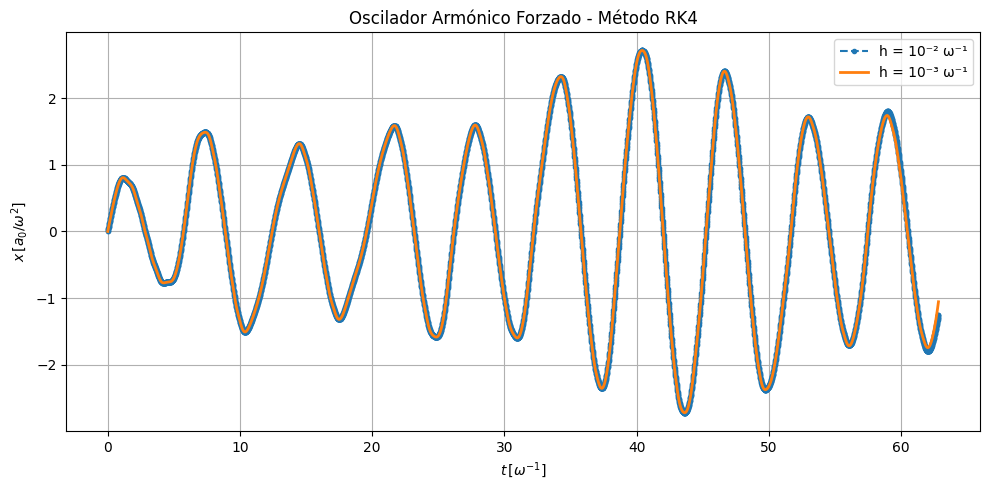

In [ ]:
# Definimos parámetros del problema
omega = 1.0          # arbitrario
a0 = 1.0             # arbitrario
Omega = 2 * np.pi * omega
k = 2 * np.pi / (a0 / omega**2)

# Condiciones iniciales
x0 = 0
v0 = a0 / omega

# Tiempo de simulación
P = 2 * np.pi / omega
t_max = 10 * P

# Pasos temporales
h1 = 1e-2 / omega
h2 = 1e-3 / omega

# Sistema de ecuaciones para RK4
def f(t, y):
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x + a0 * np.sin(k * x - Omega * t)
    return np.array([dxdt, dvdt])

# Método RK4
def rk4(f, y0, t0, tf, h):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    while t < tf:
        if t + h > tf:
            h = tf - t
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4)/6
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# Simulaciones
t1, y1 = rk4(f, np.array([x0, v0]), 0, t_max, h1)
t2, y2 = rk4(f, np.array([x0, v0]), 0, t_max, h2)

# Normalizamos
t1_norm = omega * t1
x1_norm = omega**2 * y1[:, 0] / a0
t2_norm = omega * t2
x2_norm = omega**2 * y2[:, 0] / a0

# Gráficamos
plt.figure(figsize=(10, 5))
plt.plot(t1_norm, x1_norm, label=f'h = 10⁻² ω⁻¹', linestyle='--', marker='o', markersize=3)
plt.plot(t2_norm, x2_norm, label=f'h = 10⁻³ ω⁻¹', linestyle='-', linewidth=2)
plt.xlabel(r'$t \, [\omega^{-1}]$')
plt.ylabel(r'$x \, [a_0 / \omega^2]$')
plt.title('Oscilador Armónico Forzado - Método RK4')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#P3

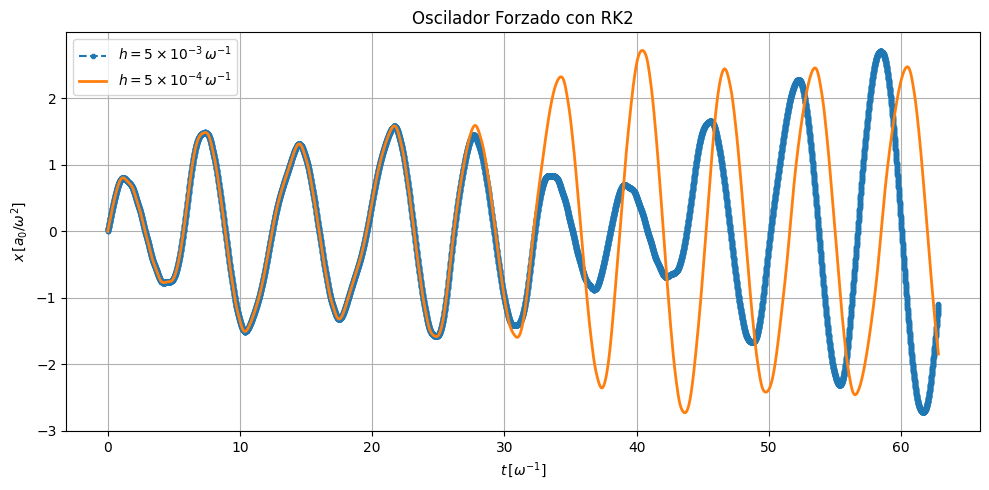

In [ ]:
# Pasos temporales para RK2
h1 = 5e-3 / omega
h2 = 5e-4 / omega

# Método RK2 (punto medio)
def rk2(f, y0, t0, tf, h):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    while t < tf:
        if t + h > tf:
            h = tf - t
        k1 = f(t, y)
        k2 = f(t + h/2, y + h/2 * k1)
        y = y + h * k2
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# Correr simulaciones
t1, y1 = rk2(f, np.array([x0, v0]), 0, t_max, h1)
t2, y2 = rk2(f, np.array([x0, v0]), 0, t_max, h2)

# Normalización
t1_norm = omega * t1
x1_norm = omega**2 * y1[:, 0] / a0
t2_norm = omega * t2
x2_norm = omega**2 * y2[:, 0] / a0

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(t1_norm, x1_norm, label=r'$h = 5 \times 10^{-3} \, \omega^{-1}$', linestyle='--', marker='o', markersize=3)
plt.plot(t2_norm, x2_norm, label=r'$h = 5 \times 10^{-4} \, \omega^{-1}$', linewidth=2)
plt.xlabel(r'$t \, [\omega^{-1}]$')
plt.ylabel(r'$x \, [a_0 / \omega^2]$')
plt.title('Oscilador Forzado con RK2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Se tiene que el método RK4 es más eficiente para este caso, ya que requiere menos evaluaciones totales para alcanzar precisión similar y tolera pasos temporales más grandes manteniendo estabilidad (error truncamiento local
$\mathcal{O}(h^5)$ vs $\mathcal{O}(h^3)$
de RK2). El método RK2 necesitaría pasos significativamente más pequeños (y más costosos) para igualar la precisión de RK4.